``` py

!pip install takeHomeTest
import takeHomeTest

!pip install time
from time import oneWeek as panic

panic.dump(takeHomeTest)


print("Welcome to your take home final!\n")
```

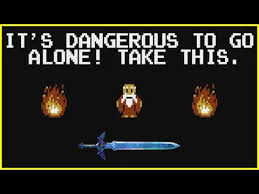




## ------------------------------------------- The Legend of Python --------------------------------------------
**Lore**

In the Kingdom of Pyrovia, all nations once traded in harmony. But since the Shattering of the Global APIs, the knowledge of currency exchange — locked away in XML scrolls — has scattered across the timelines. These scrolls reside in a mysterious repository known only as floatrates.com.

The High Council of Programmers has summoned you (and only you), young code-wielder, to begin your final trial. It is divided into 2 parts.
* Quest 1 (50xp): Retrieving the scrolls of time - Threading and Json save and parsing
* Quest 2 (50xp): Decipher the scrolls - Perform EDA on the data.

------ ------ ------ ------ Extra credit ------ ------ ------ ------ 
* Side Quest 1 (10xp*): Lay down seeds for those that follow - create error logs 
* Side Quest 2 (10xp*): The Quest of reflection  - Use profiling on your code to fully understand it 

*any points over 100% will be rolled over into your final grade. 

I may not have time to run all of your code so make sure you very clearly take notes and communicate successes, issues, and lessons learned. 
Please stay off Chat GPT and stack overflow (and like). You should have most everything you need in the notes. 

--------------------------------------------
# Quest 1 (50 xp): Retrieving the Scrolls of Time 
Retrieve historical exchange rate data from floatrates.com for one of the (Ideally randomly pick) 52 available currencies, starting from the first record on May 4, 2011, until the present day.

- You may store the data as-is in XML, or convert it to JSON, you may use the supplied code below as a starter. 

- Organize each currency into its own directory.

- Ensure your code is modular, maintainable, and robust against timeouts or malformed entries.

## Notes from the Grand Master 
* Threading is your ally. But do not burn out your ally as they have limited resources. You may use the threading or multi-core to parallelize downloads — but mind the server’s load. Around 10 threads is wise. 
    - You should have around 5040 queries.

* XML Scrolls is a new and unfamiliar beast. Therefore takeing on this beast will wield 5 extra experience points. You will not be penalized for choosing to use JSON

*  Use the Save. Nothing is worse than losing experience you have already gained. Save the raw XML (or converted JSON) using timestamped (in my example below) files so you do not need to look it up again. Ie. If you put in a start date and your program has already read that data it should not pull that date again. (it would be a good idea to delete your data and run it top to bottom before final submission)

* Design gracefully. Structure your project with clear modules: downloader.py, parser.py, and so on. 

* Log your quest progress in your quest book to show the Grand Master what you learned this is very important. 


--------------------------------------------

In [ ]:
!pip install xmltodict

In [ ]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]

In [ ]:
import requests
import xmltodict
import json
import random

# URL of the XML data
date = "2011-05-04"
base = random.choice(ratesForBase)
url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
print(url)
# Fetch the XML data
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the XML data to a Python dictionary
data_dict = xmltodict.parse(response.text)

# Convert the dictionary to a JSON string
json_data = json.dumps(data_dict, indent=4)

# Print the JSON data
print(json_data)

# Optionally, write the JSON data to a file
with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
    json_file.write(json_data)


--------------------------------------------
# Quest 2 (50 XP): Decipher the scrolls – Exploratory Data Analysis

Once the scrolls have been retrieved their knowledge remains unrefined there patterns hidden, trends veiled. Your task now is to become the Seer of Exchange, the one who can read the currencies’ fates through the lens of data.
8
Perform Exploratory Data Analysis (EDA) on the dataset you collected in Quest 1. 
- Aggregate and visualize trends in exchange rate over time for at least 5 major currencies (e.g., USD, EUR, GBP, JPY, CNY).

- Identify periods of volatility — perhaps during economic upheaval

- Generate at least multiple visualizations using seaborn:

- Log your quest progress in your quest book to show the Grand Master what you learned this is very important. some examples of observations are:
    - Anomalies, seasonal patterns, or economic events
    - Currencies with the most/least stability
    - Any interesting correlations between currencies


## Notes from the Grand Master 
- All of your work in this section should be in your jupyter notebook. 

- It might be helpful to use  google to reveal how economic events affected currency. Use Google News or economic calendars to correlate real-world events to exchange rate spikes or dips.


--------------------------------------------


# Side Quest 1 (10 XP): Lay Down Seeds for Those Who Follow – Logging

Even the greatest explorer must leave breadcrumbs for those who walk the path after them. Here you will construct an error log system, a journal that captures both triumphs and catastrophes.

Implement a robust logging system throughout your codebase to monitor:
- Successful currency downloads
- Parsing attempts and failures
- Skipped downloads (due to saved data or time out)
- Connection errors

## Notes from the Grand Master
- You do not need to do log hierarchy 
- Use log levels: INFO for progress, WARNING for skips, ERROR for failures



--------------------------------------------


# Side Quest 2 (10 XP): The quest of Reflection – Code Profiling

The final challenge for any Adventure is introspection — learning the nature of one's own power. In this side quest, you will profile your code, to discover its bottlenecks, inefficiencies, and optimization opportunities.

Use profiling tools to evaluate:
- Which functions are taking the most time
- How threads/processes are behaving
- Whether I/O is a bottleneck

*A random vendor appears* His invintory shows:
- A Profiler function - cProfile or Profile 
- A time module - timeit for micro-benchmarks
- A line profiler - line_profiler

In [ ]:
import requests
import xmltodict
import json
import random
import os
import threading
import datetime
import time
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime, timedelta
import cProfile
import pstats

# Configure logging to keep track of our epic quest
logging.basicConfig(
    filename='exchange_rates.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

# The ancient runes (currency codes) we seek
RATES = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", 
         "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", 
         "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", 
         "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]

# Currencies to use as a base (excluding the usual suspects)
RATES_FOR_BASE = [r for r in RATES if r not in ["USD", "EUR", "GBP"]]

# The timeline we're interested in
START_DATE = "2011-05-04"
END_DATE = datetime.now().strftime("%Y-%m-%d")

# Number of brave threads to send into the fray
NUM_THREADS = 10

class ScrollRetriever:  # Formerly ExchangeRateDownloader
    """
    Handles the downloading of historical exchange rate data from floatrates.com.
    We're basically Indiana Jones, but with XML instead of golden idols.
    """
    
    def __init__(self, base_currency, start_date=START_DATE, end_date=END_DATE):
        """
        Initializes the scroll retriever with a base currency and date range.
        
        Args:
            base_currency (str): The currency code to use as the base.
            start_date (str): The start date for the data range (YYYY-MM-DD).
            end_date (str): The end date for the data range (YYYY-MM-DD).
        """
        self.base_currency = base_currency
        self.start_date = datetime.strptime(start_date, "%Y-%m-%d")
        self.end_date = datetime.strptime(end_date, "%Y-%m-%d")
        self.data_dir = os.path.join("exchange_data", base_currency)  # More robust path joining
        
        # Making sure our treasure map leads somewhere
        os.makedirs(self.data_dir, exist_ok=True)
        logging.info(f"Ensured directory exists for {base_currency}")
    
    def generate_date_range(self):
        """
        Generates a sequence of dates from the start date to the end date.
        
        Yields:
            str: Dates formatted as YYYY-MM-DD.
        """
        current_date = self.start_date
        while current_date <= self.end_date:
            yield current_date.strftime("%Y-%m-%d")
            current_date += timedelta(days=1)
    
    def get_file_path(self, date_str):
        """
        Constructs the file path for a specific date's data.
        
        Args:
            date_str (str): The date in YYYY-MM-DD format.
        
        Returns:
            str: The full file path for the JSON file.
        """
        return os.path.join(self.data_dir, f"{date_str}_exchange_rates.json")
    
    def file_exists(self, date_str):
        """
        Checks if the data file for a specific date already exists.
        
        Args:
            date_str (str): The date in YYYY-MM-DD format.
        
        Returns:
            bool: True if the file exists, False otherwise.
        """
        return os.path.exists(self.get_file_path(date_str))
    
    def download_data(self, date_str):
        """
        Downloads exchange rate data for a specific date from floatrates.com.
        
        Args:
            date_str (str): The date for which to download data (YYYY-MM-DD).
        
        Returns:
            dict or None: The downloaded data as a dictionary, or None if an error occurred.
        """
        filepath = self.get_file_path(date_str)
        if os.path.exists(filepath):
            logging.warning(f"Skipping download for {date_str} - file already exists")
            return None
        
        url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date_str}&base_currency_code={self.base_currency}&format_type=xml"
        
        try:
            # Gotta be nice to the floatrates.com overlords
            time.sleep(random.uniform(0.1, 0.5))
            
            response = requests.get(url, timeout=10)
            response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
            
            # Convert XML content to a Python dictionary
            data_dict = xmltodict.parse(response.text)
            
            # Persist the data as JSON
            with open(filepath, "w") as json_file:
                json.dump(data_dict, json_file, indent=2)
            
            logging.info(f"Successfully downloaded and saved data for {date_str}")
            return data_dict
            
        except requests.exceptions.Timeout:
            logging.error(f"Timeout error for {date_str}")
        except requests.exceptions.RequestException as e:
            logging.error(f"Request error for {date_str}: {e}")
        except Exception as e:
            logging.error(f"Unexpected error processing data for {date_str}: {e}")
        
        return None
    
    def download_all_data(self):
        """
        Downloads data for all dates in the range using a thread pool.
        
        Returns:
            tuple: The number of successful and failed downloads.
        """
        dates = list(self.generate_date_range())
        
        with ThreadPoolExecutor(max_workers=NUM_THREADS) as executor:
            results = list(executor.map(self.download_data, dates))
        
        triumph_count = sum(1 for r in results if r is not None)  # Formerly success_count
        facepalm_count = len(dates) - triumph_count  # Formerly fail_count
        
        logging.info(f"Download summary: {triumph_count} successful, {facepalm_count} failed")
        return triumph_count, facepalm_count


class ScrollDecipherer:  # Formerly ExchangeRateParser
    """
    Parses downloaded exchange rate data and converts it into a pandas DataFrame.
    Like cracking the Da Vinci Code, but with currencies.
    """
    
    def __init__(self, base_currency):
        """
        Initializes the parser with the base currency and data directory.
        
        Args:
            base_currency (str): The currency code to use as the base.
        """
        self.base_currency = base_currency
        self.data_dir = os.path.join("exchange_data", base_currency)
    
    def load_data(self):
        """
        Loads and parses all available data for the base currency.
        
        Returns:
            pandas.DataFrame: A DataFrame containing the parsed exchange rate data.
        """
        all_data = []
        
        try:
            file_list = [f for f in os.listdir(self.data_dir) if f.endswith('.json')]
            
            for filename in file_list:
                date_str = filename.split('_')[0]  # Extract date from filename
                filepath = os.path.join(self.data_dir, filename)
                
                try:
                    with open(filepath, 'r') as f:
                        data = json.load(f)
                    
                    # Extract exchange rates
                    if 'prices' in data and 'price' in data['prices']:
                        rates = data['prices']['price']
                        
                        # Append each rate to the data list
                        for rate in rates:
                            currency_code = rate.get('@code', 'N/A')
                            rate_value = float(rate.get('mid', 0))
                            
                            all_data.append({
                                'date': date_str,
                                'base_currency': self.base_currency,
                                'currency': currency_code,
                                'rate': rate_value
                            })
                    
                    logging.info(f"Parsed data from {filename}")
                    
                except Exception as e:
                    logging.error(f"Failed to parse {filename}: {e}")
        
        except Exception as e:
            logging.error(f"Failed to list files in {self.data_dir}: {e}")
        
        # Create DataFrame
        df = pd.DataFrame(all_data)
        if not df.empty:
            df['date'] = pd.to_datetime(df['date'])
            df = df.sort_values('date')
        
        return df
    
    def get_rates_for_currencies(self, df, currencies):
        """
        Filters the DataFrame to include only the specified currencies.
        
        Args:
            df (pandas.DataFrame): The DataFrame containing exchange rate data.
            currencies (list): A list of currency codes to filter for.
        
        Returns:
            pandas.DataFrame: A filtered DataFrame containing only the specified currencies.
        """
        return df[df['currency'].isin(currencies)]


def unleash_the_plots(base_currency, target_currencies=["USD", "EUR", "GBP", "CNY", "JPY"]):  # Formerly run_eda
    """
    Performs exploratory data analysis on exchange rate data.
    Generates a bunch of plots to make sense of the numbers.
    """
    parser = ScrollDecipherer(base_currency)
    df = parser.load_data()
    
    if df.empty:
        logging.warning("No data available for analysis. Did we forget to feed the hamster?")
        return
    
    # Filter data for the currencies we're interested in
    filtered_df = parser.get_rates_for_currencies(df, target_currencies)
    
    # Ensure the 'plots' directory exists
    plots_dir = "plots"
    os.makedirs(plots_dir, exist_ok=True)
    
    # Plot 1: Exchange rates over time
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=filtered_df, x='date', y='rate', hue='currency')
    plt.title(f'Exchange Rates Over Time (Base: {base_currency})')
    plt.xlabel('Date')
    plt.ylabel(f'Exchange Rate (1 {base_currency} to Currency)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "exchange_rates_over_time.png"))
    plt.close()
    
    # Plot 2: Monthly average exchange rates
    filtered_df['month'] = filtered_df['date'].dt.to_period('M')
    monthly_avg = filtered_df.groupby(['month', 'currency'])['rate'].mean().reset_index()
    monthly_avg['month'] = monthly_avg['month'].astype(str)
    
    plt.figure(figsize=(14, 8))
    for currency in target_currencies:
        currency_data = monthly_avg[monthly_avg['currency'] == currency]
        plt.plot(currency_data['month'], currency_data['rate'], label=currency)
    
    plt.title(f'Monthly Average Exchange Rates (Base: {base_currency})')
    plt.xlabel('Month')
    plt.ylabel(f'Average Exchange Rate (1 {base_currency} to Currency)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "monthly_average_rates.png"))
    plt.close()
    
    # Plot 3: Exchange rate volatility (30-day rolling standard deviation)
    plt.figure(figsize=(14, 8))
    for currency in target_currencies:
        currency_data = filtered_df[filtered_df['currency'] == currency].sort_values('date')
        if not currency_data.empty:
            rolling_std = currency_data.set_index('date')['rate'].rolling(window=30).std()
            plt.plot(rolling_std.index, rolling_std.values, label=currency)
    
    plt.title(f'30-Day Volatility of Exchange Rates (Base: {base_currency})')
    plt.xlabel('Date')
    plt.ylabel('30-Day Rolling Standard Deviation')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "exchange_rate_volatility.png"))
    plt.close()
    
    # Plot 4: Distribution of exchange rates
    plt.figure(figsize=(14, 8))
    for currency in target_currencies:
        currency_data = filtered_df[filtered_df['currency'] == currency]
        if not currency_data.empty:
            sns.kdeplot(currency_data['rate'], label=currency)
    
    plt.title(f'Distribution of Exchange Rates (Base: {base_currency})')
    plt.xlabel(f'Exchange Rate (1 {base_currency} to Currency)')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "exchange_rate_distribution.png"))
    plt.close()
    
    # Plot 5: Correlation heatmap
    pivot_df = filtered_df.pivot_table(index='date', columns='currency', values='rate')
    corr_matrix = pivot_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Between Currencies (Base: {base_currency})')
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "currency_correlation_heatmap.png"))
    plt.close()
    
    # Identify periods of high volatility
    high_volatility_periods = {}
    for currency in target_currencies:
        currency_data = filtered_df[filtered_df['currency'] == currency].sort_values('date')
        if not currency_data.empty:
            currency_data = currency_data.set_index('date')
            rolling_std = currency_data['rate'].rolling(window=30).std()
            
            threshold = rolling_std.quantile(0.95)
            high_vol_days = rolling_std[rolling_std > threshold]
            
            if not high_vol_days.empty:
                high_volatility_periods[currency] = high_vol_days.index.tolist()
    
    logging.info("Periods of high volatility:")
    for currency, periods in high_volatility_periods.items():
        if periods:
            period_ranges = []
            start = periods[0]
            
            for i in range(1, len(periods)):
                if (periods[i] - periods[i-1]).days > 7:  # A gap of more than a week
                    period_ranges.append((start, periods[i-1]))
                    start = periods[i]
            
            period_ranges.append((start, periods[-1]))
            
            logging.info(f"{currency}: {period_ranges}")
    
    return filtered_df


def profile_performance():
    """
    Profiles the performance of the download and parsing operations using cProfile.
    Helps us find out where the code is dragging its feet.
    """
    home_currency = random.choice(RATES_FOR_BASE)  # Formerly base_currency
    
    # Limit the date range for profiling the download operation
    downloader = ScrollRetriever(home_currency, START_DATE, "2011-05-14")  # Just 10 days
    
    logging.info("Profiling download operation...")
    cProfile.runctx('downloader.download_all_data()', globals(), locals(), 'download_profile.prof')
    
    parser = ScrollDecipherer(home_currency)
    
    logging.info("Profiling parsing operation...")
    cProfile.runctx('parser.load_data()', globals(), locals(), 'parse_profile.prof')
    
    # Analyze and print profiling results
    for prof_file in ['download_profile.prof', 'parse_profile.prof']:
        stats = pstats.Stats(prof_file)
        stats.strip_dirs().sort_stats('cumulative').print_stats(10)


def main():
    """
    Main entry point of the script.
    Where the magic happens.
    """
    home_currency = random.choice(RATES_FOR_BASE)  # Formerly base_currency
    logging.info(f"Using {home_currency} as the base currency. 💰")
    
    # Ensure the base directory exists
    os.makedirs("exchange_data", exist_ok=True)
    
    # Download data
    downloader = ScrollRetriever(home_currency)
    triumph_count, facepalm_count = downloader.download_all_data()  # Formerly success_count, fail_count
    
    logging.info(f"Downloaded data for {triumph_count} days, with {facepalm_count} failures. 👍 {triumph_count}, 😭 {facepalm_count}")
    
    # Run EDA
    target_currencies = ["USD", "EUR", "GBP", "CNY", "JPY"]
    df = unleash_the_plots(home_currency, target_currencies)
    
    # Profile the code
    profile_performance()
    
    logging.info("All tasks completed. Mission accomplished! 🎉")


if __name__ == "__main__":
    main()